# Author: Obi Chinyere Mary 

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset

df = pd.read_csv(r"C:\Users\hp\Desktop\Dataset\DecoderBot\Flight_Price_Prediction.csv")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# let's drop rows with missing values

df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
# find duplicate rows
duplicate_rows = df.duplicated().sum()

# print duplicate rows
print(duplicate_rows)

220


In [9]:
# remove duplicate rows based on all columns

df.drop_duplicates(inplace=True)

In [10]:
# to check the shape after removing duplicates

df.shape

(10462, 11)

In [11]:
# Statistical summary of all numeric values.
df.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


# Data Cleaning and Preprocessing

In [12]:
# Now we see the unique value for Airline 

df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [13]:
df['Airline'] =df['Airline'].str.replace("Vistara Premium economy", "Vistara")
df['Airline'] =df['Airline'].str.replace("Jet Airways Business", "Jet Airways")
df['Airline'] =df['Airline'].str.replace("Multiple carriers Premium economy", "Multiple carriers")

df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [14]:
# Same we have to do for destination feature

df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [15]:
df['Destination'] =df['Destination'].str.replace("New Delhi", "Delhi")

df["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [16]:
df['Route']=df['Route'].str.replace("?" , "-")
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR - DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [17]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [18]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop':'0', '1 stop':'1', '2 stops': '2',
                                               '3 stops': '3','4 stops':'4'})

In [19]:
df['Total_Stops'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [20]:
# Converting 'Date_of_Journey' column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Feature engineering

In [21]:
# Extract day and month from 'Date_of_Journey'

df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [22]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,Delhi,BLR - DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,7h 25m,2,No info,7662,5,1


In [23]:
# Extract hours and minutes from 'Dep_Time'

df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [24]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR - DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,5,50


In [25]:
# Extract hours and minutes from 'Arrival_Time'
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [26]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR - DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,5,50,13,15


In [27]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Day                 int64
Journey_Month               int64
Dep_Hour                    int64
Dep_Min                     int64
Arrival_Hour                int64
Arrival_Min                 int64
dtype: object

# Exploratory Data Analysis

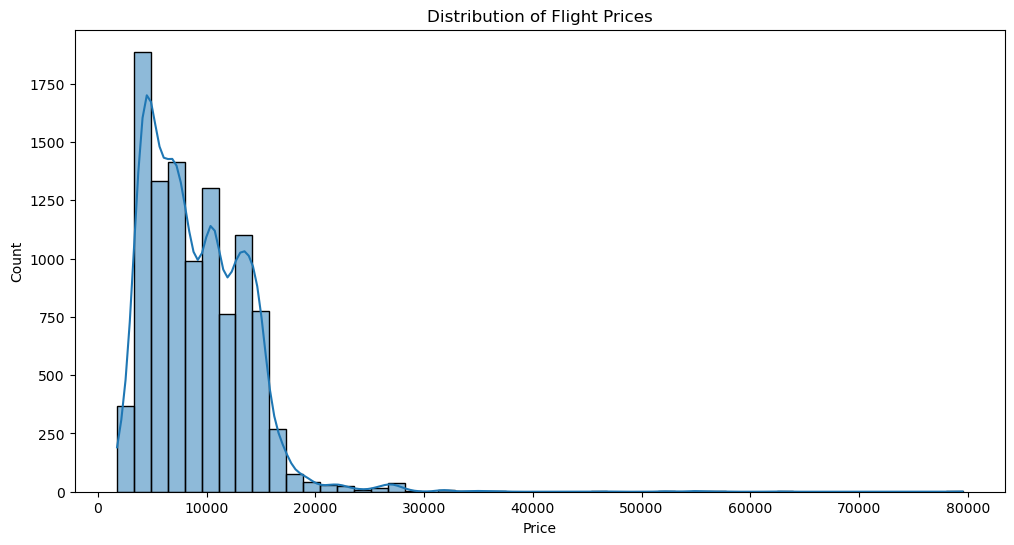

In [28]:
# Explore the distribution of 'Price'
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

The distribution of Price column is right skewed means most of the flights having low price around 10000 while some flights are expensive which gives me the direction of outlier in price column

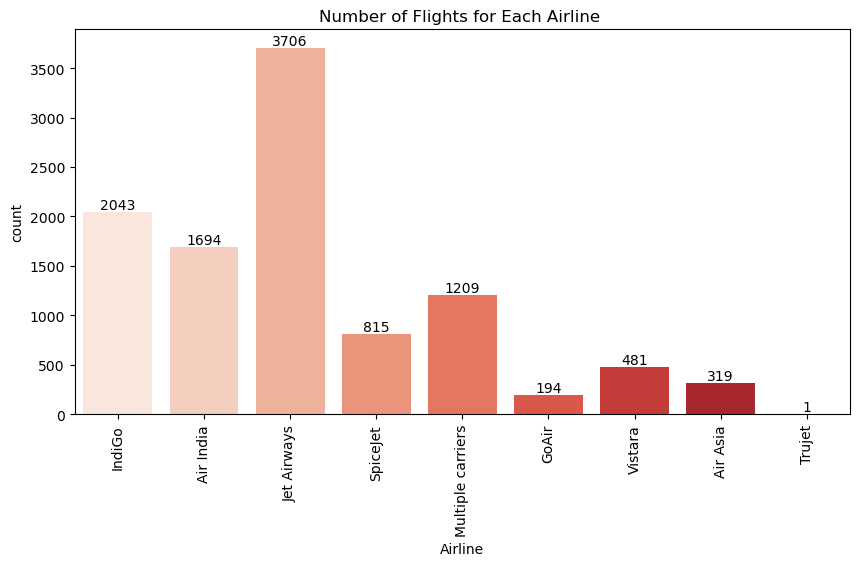

In [29]:
# Number of Flights for Each Airline 

df['Airline'].value_counts()

# Plotting the distribution
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Airline",  data=df, palette="Reds")
plt.title('Number of Flights for Each Airline ')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

plt.show()

The most demanding Airline is Jet Airways, followed by IndiGo and the least demanding is Trujet followed by GoAir.

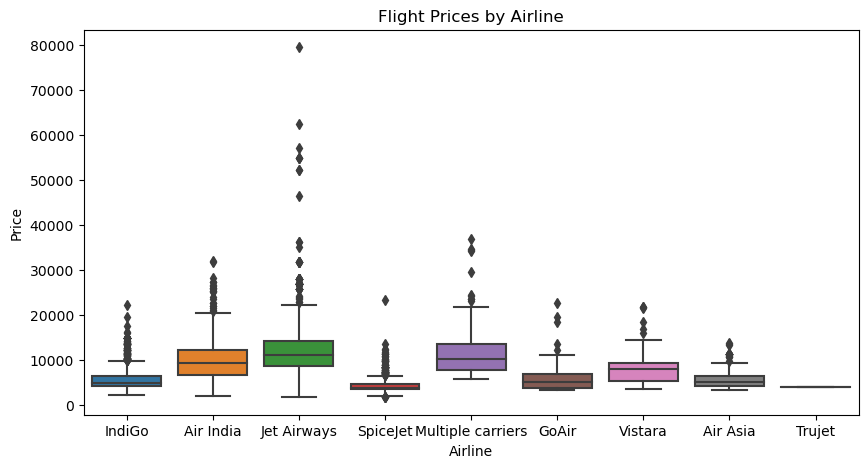

In [30]:
# Relationship between 'Price' and 'Airline'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.show()

The Airline with the most expensive flight is Jet Airways while the most affordable is Trujet.

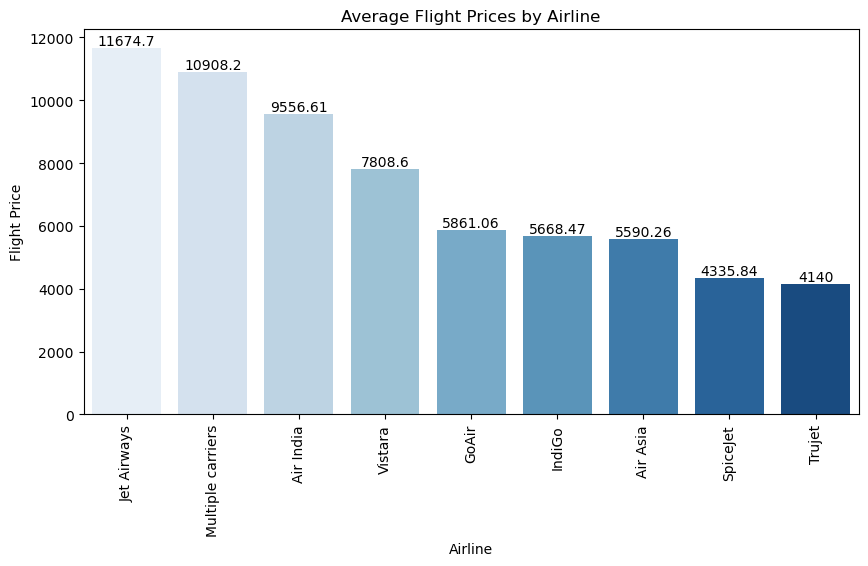

In [31]:
# Which airline has the most expensive ticket price
airline_prices = df.groupby('Airline')['Price'].mean().reset_index()

# sorting the airlines by average price in descending order
airline_prices = airline_prices.sort_values(by="Price", ascending=False)

# Plot for airline average price in descending order
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.barplot(data=airline_prices, x='Airline', y='Price', ax=ax, palette="Blues")
ax.set_title('Average Flight Prices by Airline')
ax.set_xlabel('Airline')
ax.set_ylabel('Flight Price')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
ax.bar_label(ax.containers[0])  # Add labels to the bars

# Show the plot
plt.show()

Jet Airways has the highest average ticket price, while the cheapest is Trujet Airline

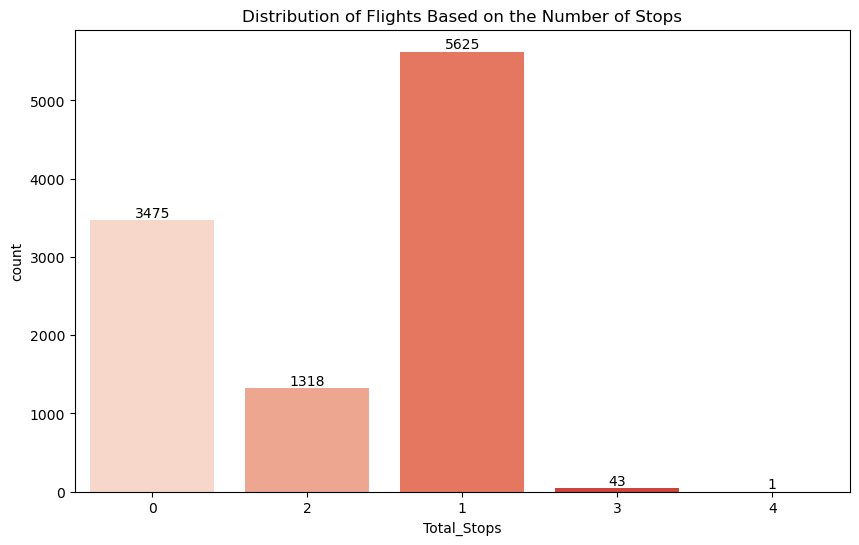

In [32]:
# What is the distribution of flights by number of stoppage?
df["Total_Stops"].value_counts()

# Plotting the distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="Total_Stops",  data=df, palette="Reds")
plt.title("Distribution of Flights Based on the Number of Stops")
ax.bar_label(ax.containers[0])

plt.show()

Most flights has 1 stopover and only one flight has '4' Stopovers. 

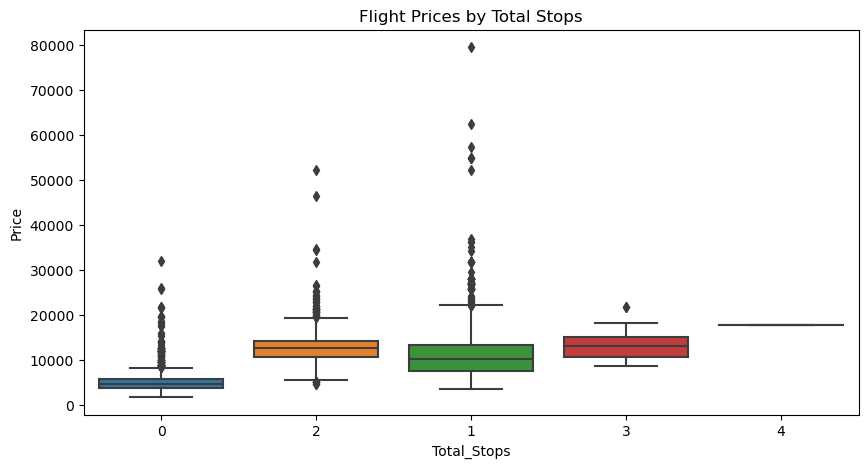

In [33]:
# Relationship between 'Price' and 'Total_Stops'

plt.figure(figsize=(10, 5))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Prices by Total Stops')
plt.show()

## What is the average price variation among different numbers of stoppages in flights

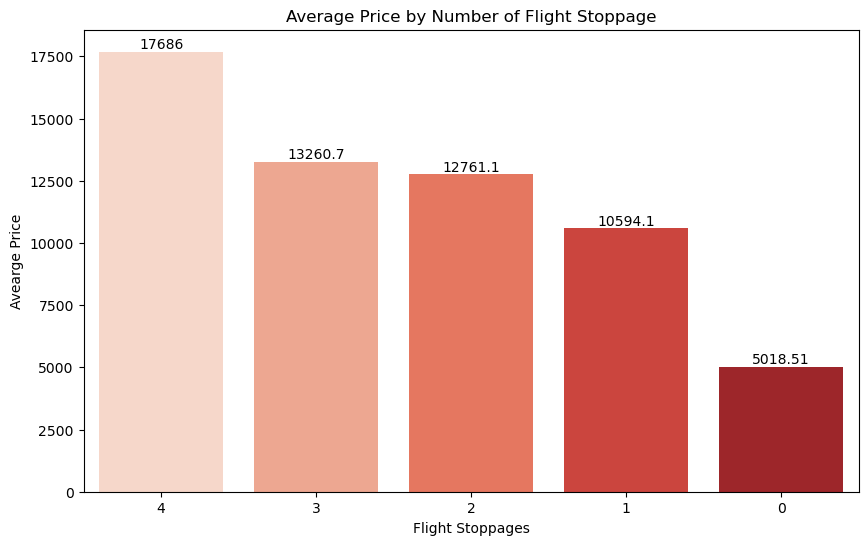

In [34]:
# How many flights have a specific number of stops?
flight_stoppage= df.groupby(["Total_Stops"])["Price"].mean().reset_index()

# sorting the airlines by average price in descending order
flight_stoppage = flight_stoppage.sort_values(by="Total_Stops", ascending=False)

# Plot for airline average price in descending order
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=flight_stoppage, x='Total_Stops',y='Price', ax=ax, palette="Reds")
ax.set_title('Average Price by Number of Flight Stoppage')
ax.set_xlabel('Flight Stoppages')
ax.set_ylabel('Avearge Price')
ax.bar_label(ax.containers[0])  # Add labels to the bars

# Show the plot
plt.show()

Stoppage 4 has the highest average ticket prices while Stoppage 0 is the cheapest. Higher the numbers of stops the higher the price. It can be deduced that there is a correlation here.

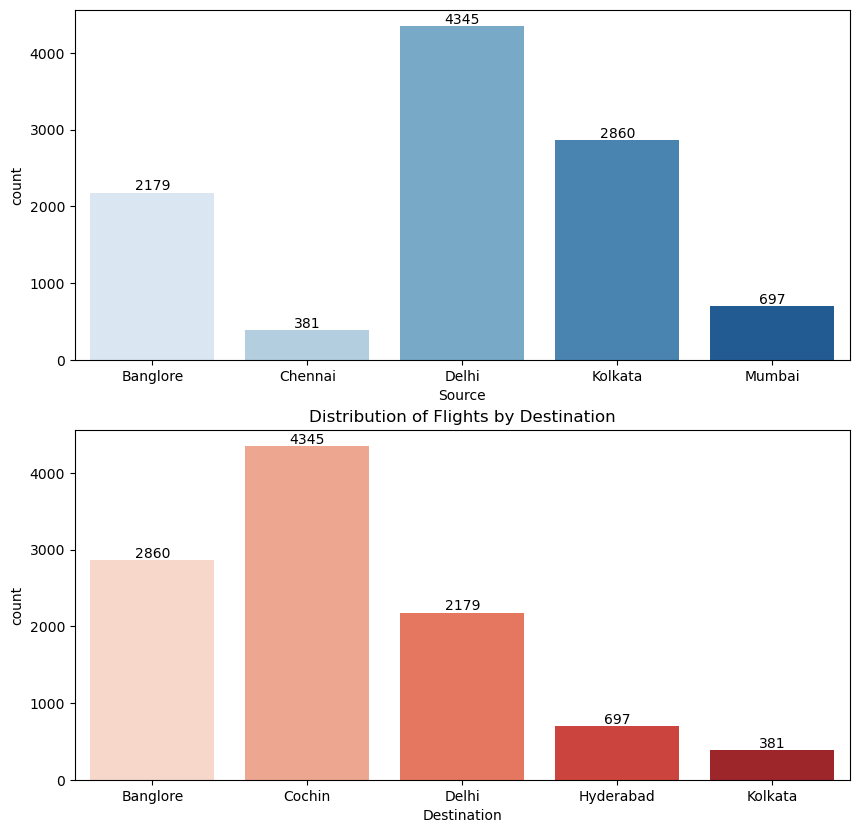

In [35]:
# What are the numbers of flight for each destination and source?
flights_by_source= df.sort_values('Source', ascending=True)

flights_by_destination = df.sort_values('Destination', ascending=True)

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plotting the distribution
ax = sns.countplot(x="Source",  data=flights_by_source, palette="Blues", ax=axes[0])
plt.title("Distribution of Flights by Source")
ax.bar_label(ax.containers[0])


# Plotting the distribution
ax = sns.countplot(x="Destination",  data=flights_by_destination, palette="Reds", ax=axes[1])
plt.title("Distribution of Flights by Destination")
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
Delhi has the largest number of flight 'Source' at 4,345 while 'Destination' is Cochin.

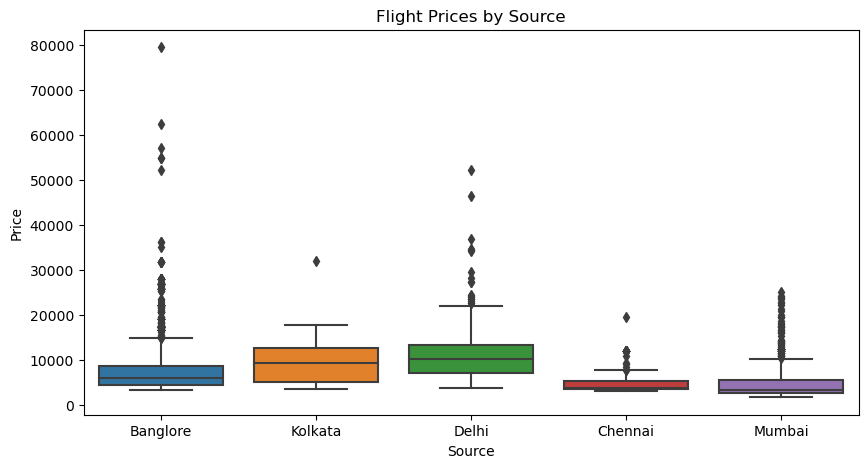

In [36]:
# Relationship between 'Price' and 'Total_Stops'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Flight Prices by Source')
plt.show()

Ticket Prices vary from different Sources, but Banglore has the highest ticket price from 'Source'

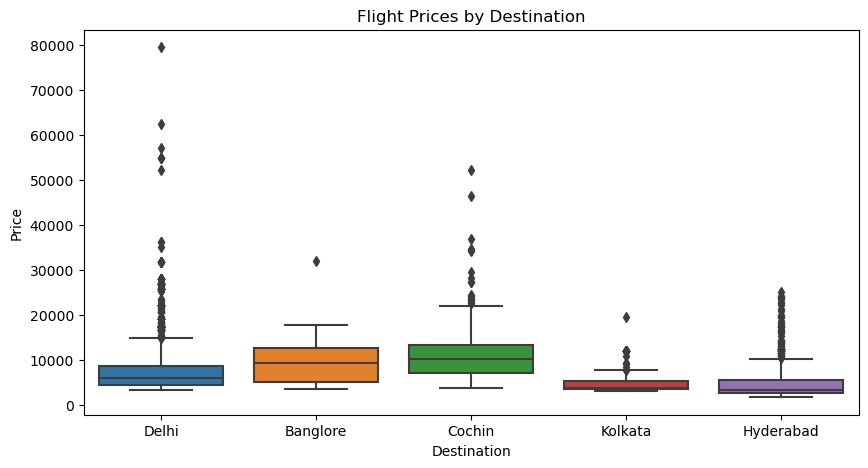

In [37]:
# Relationship between 'Price' and 'Destination'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title('Flight Prices by Destination')
plt.show()

Delhi has the highest flight price from destination. The average flight price varies significantly depending on both the source and destination locations.

In [38]:
# Converts categorical columns into numerical values using label encoding.

le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])
df['Route'] = le.fit_transform(df['Route'])
df['Total_Stops'] = le.fit_transform(df['Total_Stops'])

In [39]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,2019-03-24,0,2,18,22:20,01:10 22 Mar,2h 50m,0,8,3897,24,3,22,20,1,10


In [40]:
# Select relevant features for prediction

X = df[['Airline', 'Source', 'Destination', 'Journey_Day', 'Journey_Month',
        'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min',
        'Duration', 'Total_Stops', 'Additional_Info']]

In [41]:
X['Duration'] = X['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

# Round the values in the ''Duration' column to 2 decimal points
X['Duration'] = X['Duration'].apply(lambda x: round(x, 2))

In [42]:
X.head()

,Airline,Source,Destination,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration,Total_Stops,Additional_Info
0,3,0,2,24,3,22,20,1,10,2.83,0,8
1,1,3,0,5,1,5,50,13,15,7.42,2,8
2,4,2,1,6,9,9,25,4,25,19.00,2,8
3,3,3,0,5,12,18,5,23,30,5.42,1,8
4,3,0,2,3,1,16,50,21,35,4.75,1,8


In [43]:
# Target variable # Get the target dataset called 'y'

y = df['Price']

In [44]:
# Data Splitting - Split the data into training and testing sets - 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize a Random Forest Regressor

rf = RandomForestRegressor()

In [46]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Use GridSearchCV without random_state
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error',
                           cv=5, verbose=2, n_jobs=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.6s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
# Fit the model with the best hyperparameters

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=300)

In [48]:
# Apply model to make predictions

y_pred = best_rf.predict(X_test)

In [49]:
# Evaluate the model
# This computes and prints the Root Mean Squared Error, a measure of how well the model performs on the test set.

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1630.7043872063578


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print(f" Mean Squared Error: {mse}")
print(f" r2_score: {r2}")

 Mean Squared Error: 2659196.7984540625
 r2_score: 0.8724622757868268


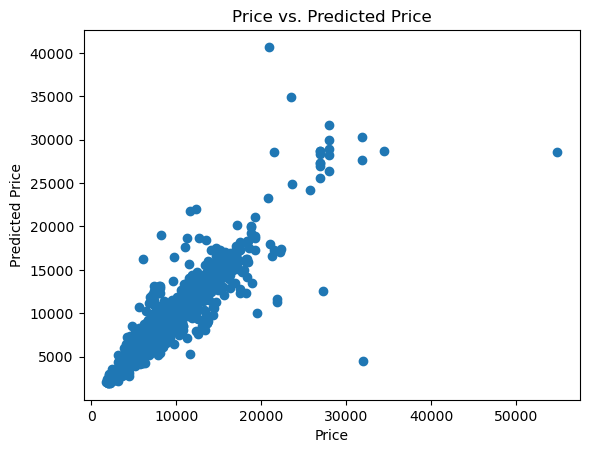

In [53]:

plt.scatter(y_test, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs. Predicted Price")
plt.show()